### 1. Import required libraries and read the dataset

In [1]:
import pandas as pd 
import numpy as np

In [2]:
d=pd.read_csv(r"C:\Users\sudee\Downloads\Apps_data+(1).csv")
d

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
print(d.shape,"\n")

print(d.info(),"\n")

print(d.isnull().sum())

(10841, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building


In [4]:
d.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### 4. Check if there are any duplicate records in the dataset? if any drop them

In [5]:
d[d.duplicated()]
d.drop_duplicates(inplace=True)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [6]:
d.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
d[d.Category.isin(["1.9"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
d=d.drop(10472)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [9]:
d.Rating.isnull().sum()

1465

In [10]:
d=d.dropna()


In [11]:
d

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
d.Rating.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Rating, Length: 8886, dtype: bool

In [13]:
d.shape

(8886, 13)

In [14]:
def func(col):
    if col>=3.5:
        return "High"
    else:
        return "Low"
         

In [15]:
d["Rating_category"]=d.Rating.apply(func)

In [16]:
d

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Rating_category', ylabel='Count'>

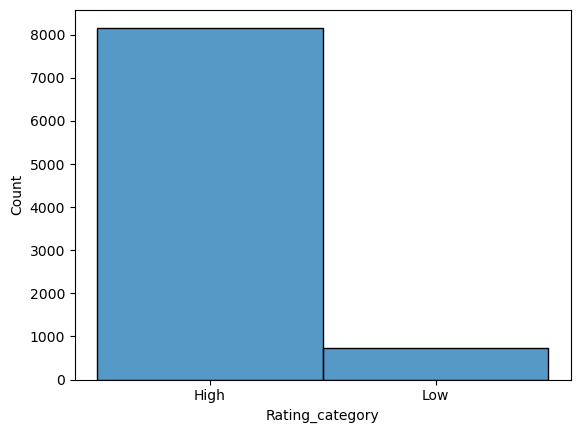

In [18]:
sns.histplot(d.Rating_category)

(array([8164.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         722.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

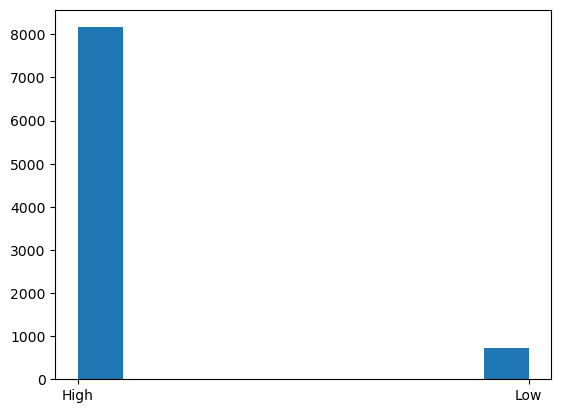

In [19]:
plt.hist(d.Rating_category)

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [20]:
d.Reviews=d.Reviews.astype(int)

In [21]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   int32  
 4   Size             8886 non-null   object 
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
dtypes: float64(1), int32(1), object(12)
memory usage: 1006.6+ KB


In [22]:
Q1=d.Reviews.quantile(0.25)

In [23]:
Q3=d.Reviews.quantile(0.75)

In [24]:
IQR=Q3-Q1

In [25]:
print(IQR)
print(Q1)
print(Q3)

71149.25
164.0
71313.25


In [26]:
np.where((d.Reviews<(Q1-1.5*Q1))|(d.Reviews>(Q3+1.5*Q3)))

(array([   3,   17,   18, ..., 8847, 8866, 8885], dtype=int64),)

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [28]:
LT=FunctionTransformer(np.log1p)

In [29]:
LT

FunctionTransformer(func=<ufunc 'log1p'>)

In [30]:
d["Reviews"]=LT.fit_transform(d[["Reviews"]])

In [31]:
d

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,2.079442,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.744932,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [32]:
d.Size.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [33]:
d.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [34]:
a=d[d.Size.isin(["Varies with device"])].index

In [35]:
d.drop(a,inplace=True)

In [36]:
d.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M', '56M',
       '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M', '27M',
       '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [37]:
def func(a):
    if "M" in str(a):
        return float(a.replace("M",""))*1000000
    elif "K" in str(a):
        return float(a.replace("K",""))*1000
    return float(a.replace("k",""))*1000

In [38]:
def fun(a):
    if "M" in str(a):
        return float(a.replace("M",""))*1000000
    elif "k" in str(a):
        return float(a.replace("k",""))*1000
    else:
        return float(a.replace("K",""))*1000

In [39]:
d["Size"]=d["Size"].apply(fun)

In [40]:
d["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7418, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. 

In [41]:
d.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7418, dtype: object

In [42]:
d.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [43]:
d.Installs=d.Installs.str.replace("+","")
d.Installs=d.Installs.str.replace(",","")

C:\Users\sudee\AppData\Local\Temp\ipykernel_5984\249893138.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  d.Installs=d.Installs.str.replace("+","")


In [44]:
d.Installs=d.Installs.astype(int)

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type. 

In [45]:
d.Price

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7418, dtype: object

In [46]:
d.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [47]:
d.Price=d.Price.str.replace("$","")

C:\Users\sudee\AppData\Local\Temp\ipykernel_5984\1880305407.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  d.Price=d.Price.str.replace("$","")


In [48]:
d.Price=d.Price.astype(float)

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [49]:
d.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [50]:
d.drop(columns=["App","Rating","Genres","Last Updated","Current Ver","Android Ver"],inplace=True)

In [51]:
d

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2600000.0,500,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000.0,5000,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3600000.0,100,Free,0.0,Everyone,High


### 13. Encode the categorical columns. 

In [52]:
d=pd.get_dummies(d,prefix=["cat_","ty","cr_"],columns=["Category","Type","Content Rating"])

In [53]:
d

,Reviews,Size,Installs,Price,Rating_category,cat__ART_AND_DESIGN,cat__AUTO_AND_VEHICLES,cat__BEAUTY,cat__BOOKS_AND_REFERENCE,cat__BUSINESS,...,cat__VIDEO_PLAYERS,cat__WEATHER,ty_Free,ty_Paid,cr__Adults only 18+,cr__Everyone,cr__Everyone 10+,cr__Mature 17+,cr__Teen,cr__Unrated
0,5.075174,19000000.0,10000,0.0,High,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.875232,14000000.0,500000,0.0,High,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,High,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,High,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.875232,2800000.0,100000,0.0,High,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.806662,619000.0,1000,0.0,High,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
10834,2.079442,2600000.0,500,0.0,High,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10836,3.663562,53000000.0,5000,0.0,High,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10837,1.609438,3600000.0,100,0.0,High,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
lb=LabelEncoder()
d["Rating_category"]=lb.fit_transform(d["Rating_category"])

In [56]:
d.head()

,Reviews,Size,Installs,Price,Rating_category,cat__ART_AND_DESIGN,cat__AUTO_AND_VEHICLES,cat__BEAUTY,cat__BOOKS_AND_REFERENCE,cat__BUSINESS,...,cat__VIDEO_PLAYERS,cat__WEATHER,ty_Free,ty_Paid,cr__Adults only 18+,cr__Everyone,cr__Everyone 10+,cr__Mature 17+,cr__Teen,cr__Unrated
0,5.075174,19000000.0,10000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.875232,14000000.0,500000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.875232,2800000.0,100000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### 14. Standardize the data, so that the values are within a particular range. 

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
minmax=MinMaxScaler()
df=minmax.fit_transform(d)

In [59]:
d=pd.DataFrame(df,columns=d.columns)

In [60]:
d

,Reviews,Size,Installs,Price,Rating_category,cat__ART_AND_DESIGN,cat__AUTO_AND_VEHICLES,cat__BEAUTY,cat__BOOKS_AND_REFERENCE,cat__BUSINESS,...,cat__VIDEO_PLAYERS,cat__WEATHER,ty_Free,ty_Paid,cr__Adults only 18+,cr__Everyone,cr__Everyone 10+,cr__Mature 17+,cr__Teen,cr__Unrated
0,0.258883,0.189931,9.999000e-06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.365228,0.139927,4.999990e-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.631334,0.086922,4.999999e-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.684615,0.249936,5.000000e-02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.365228,0.027917,9.999900e-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,0.183941,0.006106,9.990000e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7414,0.081900,0.025917,4.990000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7415,0.175487,0.529960,4.999000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7416,0.054133,0.035918,9.900000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 15. Segregate the target and independent features (Hint: Use Rating_category as the target) 

In [61]:
y=d[["Rating_category"]]

In [63]:
x=d.drop("Rating_category",axis=1)

In [64]:
x.head()

,Reviews,Size,Installs,Price,cat__ART_AND_DESIGN,cat__AUTO_AND_VEHICLES,cat__BEAUTY,cat__BOOKS_AND_REFERENCE,cat__BUSINESS,cat__COMICS,...,cat__VIDEO_PLAYERS,cat__WEATHER,ty_Free,ty_Paid,cr__Adults only 18+,cr__Everyone,cr__Everyone 10+,cr__Mature 17+,cr__Teen,cr__Unrated
0,0.258883,0.189931,0.00001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.365228,0.139927,0.00050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.631334,0.086922,0.00500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.684615,0.249936,0.05000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.365228,0.027917,0.00010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
y.head()

,Rating_category
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)